# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries
import glob
import os
import time

import collections, random, re
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import tensorflow as tf
from collections import Counter
from tensorflow.keras.layers import Dropout
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras import Model
from tensorflow.keras import layers

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [2]:
#Import the dataset and read the image into a seperate variable
DRIVE_PATH='/home/'
DATA_DIR='Eye-for-blind-data/'
IMAGE_DIR='Images/'
CAPTIONS_FILE='captions.txt'
images=DRIVE_PATH+DATA_DIR+IMAGE_DIR

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


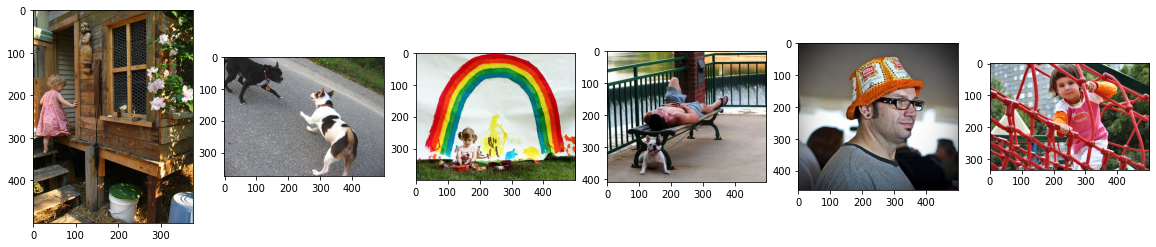

In [3]:
#Visualise both the images & text present in the dataset
figure, axes = plt.subplots(1,6)
figure.set_figwidth(20)

#Visualising first 6 images:
for ax,image in zip(axes, all_imgs[0:6]):
    ax.imshow(mpimg.imread(image), cmap=None)


In [4]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    #your code here
    with open(filename, 'r') as f:
        text = f.readlines()
    return text

text_file = DRIVE_PATH+DATA_DIR+CAPTIONS_FILE
doc = load_doc(text_file)
doc = doc[1:]
print(doc[:300])

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .\n', '1000268201_693b08cb0e.jpg,A girl going into a wooden building .\n', '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .\n', '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .\n', '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .\n', '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting\n', '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .\n', '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .\n', '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .\n', '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .\n', '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her h

In [5]:
list_of_images_and_captions = []
for i in doc:
    list_of_images_and_captions.append(i.split(",",maxsplit=1))

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [6]:
path_of_images=images
all_img_id= [img[0] for img in list_of_images_and_captions if img[0]]#store all the image id here
all_img_vector=[path_of_images+img[0] for img in list_of_images_and_captions if img[0]] #store all the image path here
annotations=[img[1] for img in list_of_images_and_captions if img[0]] #store all the captions here

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,/home/Eye-for-blind-data/Images/1000268201_693...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,/home/Eye-for-blind-data/Images/1000268201_693...,A girl going into a wooden building .\n
2,1000268201_693b08cb0e.jpg,/home/Eye-for-blind-data/Images/1000268201_693...,A little girl climbing into a wooden playhouse...
3,1000268201_693b08cb0e.jpg,/home/Eye-for-blind-data/Images/1000268201_693...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,/home/Eye-for-blind-data/Images/1000268201_693...,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472.jpg,/home/Eye-for-blind-data/Images/997722733_0cb5...,A man in a pink shirt climbs a rock face\n
40451,997722733_0cb5439472.jpg,/home/Eye-for-blind-data/Images/997722733_0cb5...,A man is rock climbing high in the air .\n
40452,997722733_0cb5439472.jpg,/home/Eye-for-blind-data/Images/997722733_0cb5...,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,/home/Eye-for-blind-data/Images/997722733_0cb5...,A rock climber in a red shirt .\n


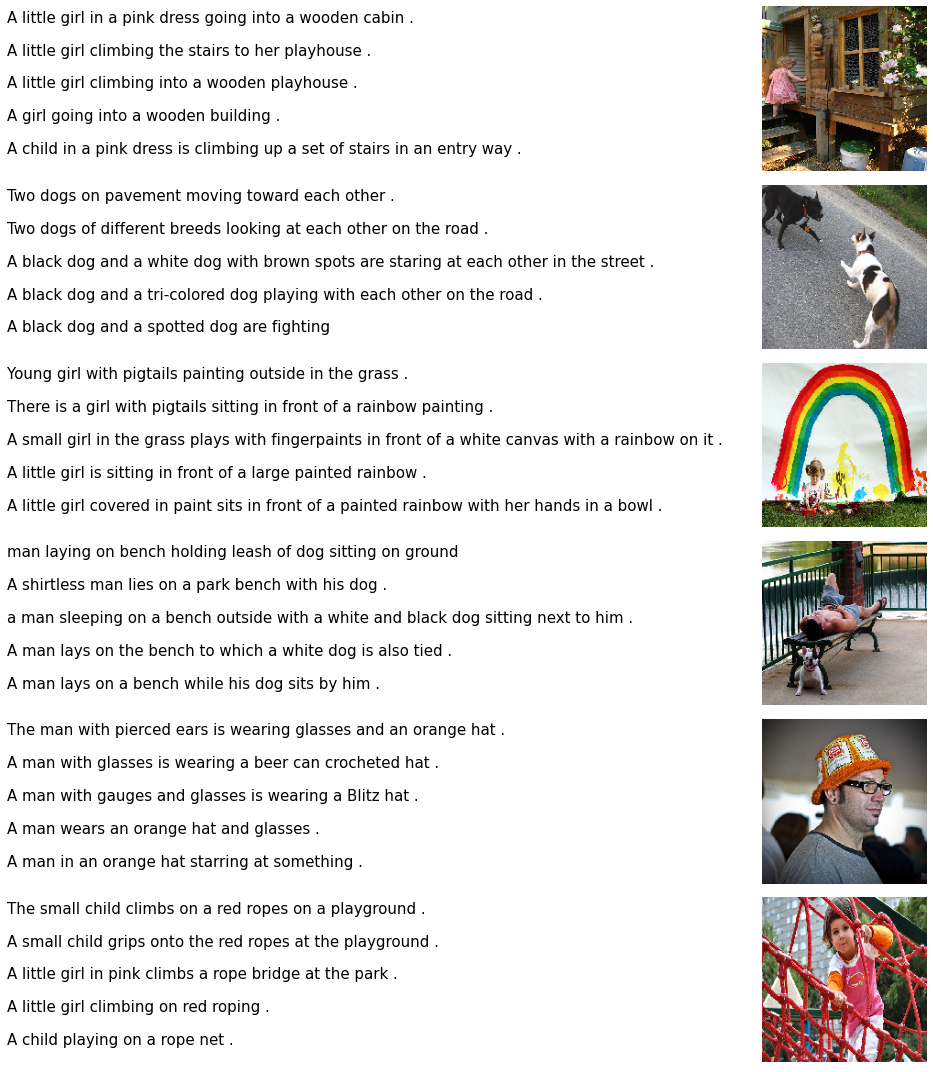

In [7]:
#Visualising text with image
fig = plt.figure(figsize=(15,15)) # Setting figsize for proper readability
count = 1

for img_path in df[:30].Path.unique(): # selecting the paths of first 6 distinct images
    captions = list(df["Captions"].loc[df.Path == img_path].values)
    display_image = tf.keras.utils.load_img(img_path,target_size=(180,180,3))

    ax = fig.add_subplot(6,2,count) # creating subplots of 6 rows
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))

    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=15)  # selecting captions fontsize
    count+=1
    plt.tight_layout() #to automatically adjust subplot parameters to give specified padding

    ax = fig.add_subplot(6,2,count)
    ax.imshow(display_image)
    plt.axis('off') #since this is a mixed display of photos and captions, we dont require axes
    count +=1

plt.show()

In [8]:
#Create a list which contains all the captions
annotations=['<start> '+ annoted_caption + ' <end>' for annoted_caption in df.Captions]#write your code here

#add the <start> & <end> token to all those captions as well

#Create a list which contains all the path to the images
all_img_path=df.Path.unique().tolist()#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [9]:
#Create the vocabulary & the counter for the captions

vocabulary=[] #write your code here
for cap in df.Captions.values:
    list_of_words = list(filter(lambda w: len(w)>0, re.split('\W+',cap.lower())))
    for word in list_of_words:# for each caption line it will pick out the words contained in them
        vocabulary.append(word)
val_count=Counter(vocabulary)
val_count

Counter({'a': 62992,
         'child': 1545,
         'in': 18986,
         'pink': 739,
         'dress': 348,
         'is': 9345,
         'climbing': 507,
         'up': 1302,
         'set': 109,
         'of': 6723,
         'stairs': 109,
         'an': 2432,
         'entry': 1,
         'way': 53,
         'girl': 3328,
         'going': 149,
         'into': 1074,
         'wooden': 284,
         'building': 510,
         'little': 1768,
         'playhouse': 6,
         'the': 18419,
         'to': 3176,
         'her': 1178,
         'cabin': 4,
         'black': 3848,
         'dog': 8138,
         'and': 8862,
         'spotted': 38,
         'are': 3504,
         'fighting': 133,
         'tri': 14,
         'colored': 221,
         'playing': 2008,
         'with': 7765,
         'each': 430,
         'other': 773,
         'on': 10745,
         'road': 398,
         'white': 3959,
         'brown': 2578,
         'spots': 29,
         'staring': 57,
         'at': 2915

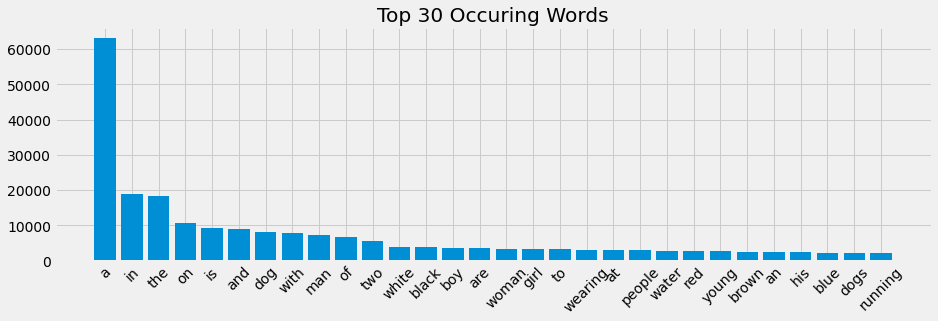

In [10]:
#Visualise the top 30 occuring words in the captions
#write your code here
def plot_top_words(word_counter):
    plt.style.use('fivethirtyeight')
    # plt.title('Most Commonly Used NOUNs')
    plt.figure(figsize=(14,4))
    plt.xticks(rotation=45)
    # plt.bar(*zip(*word_counter.most_common(30)))
    plt.bar(*zip(*word_counter))
    plt.title("Top 30 Occuring Words")
    plt.show()

plot_top_words(val_count.most_common(30))


## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [11]:
# create the tokenizer
#your code here
top_freq_words = 5000
def tokenize_captions(annotations):
    special_chars = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_freq_words,
                                                  oov_token="UNK",
                                                  filters=special_chars)
    tokenizer.fit_on_texts(annotations)
    
    # Adding PAD to tokenizer list
    tokenizer.word_index['PAD'] = 0
    tokenizer.index_word[0] = 'PAD'   
   
    return tokenizer
tokenizer = tokenize_captions(annotations)

In [12]:
# Create word-to-index and index-to-word mappings.
#your code here
word_index = tokenizer.word_index
index_word = tokenizer.index_word

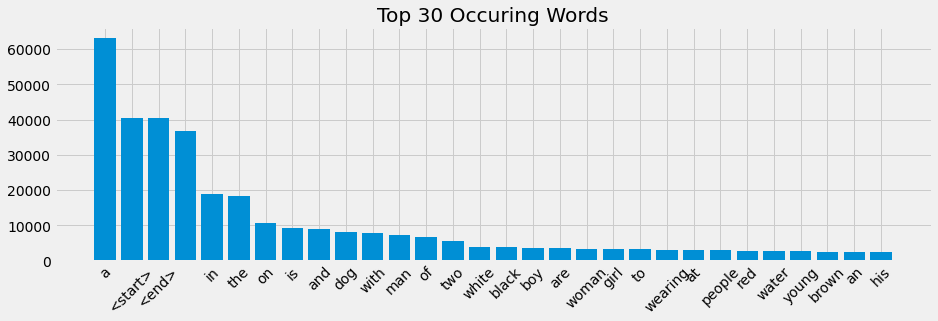

In [13]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
#your code here
sort_word_by_count = sorted(tokenizer.word_counts.items(), key=lambda kv : kv[1], reverse= True)
plot_top_words(sort_word_by_count[:30])

In [14]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
train_seqs = tokenizer.texts_to_sequences(annotations)
print(train_seqs[:5])
print(annotations[:5])
print(f'OOV Token: {tokenizer.oov_token}')
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')#your code here

print("The shape of Caption vector is :" + str(cap_vector.shape))

[[3, 2, 44, 6, 2, 92, 173, 9, 119, 53, 2, 408, 14, 414, 6, 30, 1, 674, 5, 4], [3, 2, 21, 314, 66, 2, 196, 121, 5, 4], [3, 2, 41, 21, 119, 66, 2, 196, 3113, 5, 4], [3, 2, 41, 21, 119, 7, 414, 22, 62, 3113, 5, 4], [3, 2, 41, 21, 6, 2, 92, 173, 314, 66, 2, 196, 3114, 5, 4]]
['<start> A child in a pink dress is climbing up a set of stairs in an entry way .\n <end>', '<start> A girl going into a wooden building .\n <end>', '<start> A little girl climbing into a wooden playhouse .\n <end>', '<start> A little girl climbing the stairs to her playhouse .\n <end>', '<start> A little girl in a pink dress going into a wooden cabin .\n <end>']
OOV Token: UNK
The shape of Caption vector is :(40455, 40)


In [15]:
def min_max_for_nested_array(nested_array):
    array=[len(e) for e in nested_array]
    return min(array),max(array)
min_length,max_length=min_max_for_nested_array(train_seqs)

In [16]:
# Checking if the above process worked correctly or not.
print(cap_vector[0])
print(annotations[0])

[  3   2  44   6   2  92 173   9 119  53   2 408  14 414   6  30   1 674
   5   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
<start> A child in a pink dress is climbing up a set of stairs in an entry way .
 <end>


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [17]:
#write your code here to create the dataset consisting of image paths
image_dataset = tf.data.Dataset.from_tensor_slices(all_img_path)

2024-04-23 17:29:11.928745: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-04-23 17:29:11.928810: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


In [18]:
#write your code here for creating the function. This function should return images & their path

def load_image(image_path):
    #write your pre-processing steps here
    image = tf.io.read_file(image_path)
    decoded_image = tf.io.decode_jpeg(image, channels=3)
    resized_image = tf.image.resize(decoded_image, (299, 299)) # this will resize the images into the shape of (299,299)
    preprocessed_image = tf.keras.applications.inception_v3.preprocess_input(resized_image) #among other things it will normalize the image within a range of -1 to 1.
    return preprocessed_image, image_path

# Check the preprocessing Logic
print(f'Size of image before preprocessing: {mpimg.imread(all_img_vector[0]).shape}')
print(f'Size of image after preprocessing: {load_image(all_img_vector[0])[0].shape}')

Size of image before preprocessing: (500, 375, 3)
Size of image after preprocessing: (299, 299, 3)


In [19]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path
unique_img_vector = sorted (set(all_img_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(unique_img_vector)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .batch(64)
image_dataset


<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [20]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input#write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output#write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)#build the final model using both input & output layer

In [21]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
from tqdm import tqdm
feature_dict = {}
for image,path in tqdm(image_dataset):
    batch_features = image_features_extract_model(image)
    batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
    for batch_f, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        feature_dict[path_of_feature] =  batch_f.numpy()


100%|██████████| 127/127 [00:30<00:00,  4.12it/s]


### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [22]:
#write your code here

path_train, path_test, cap_train, cap_test = train_test_split(all_img_vector,cap_vector, test_size=0.2, random_state=42)

In [23]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [24]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image_name,capt):
    img_tensor = image_tensor = feature_dict[image_name.decode('utf-8')]
    return image_tensor,capt # write your code here to extract the features from the dictionary stored earlier

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [25]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier
BATCH_SIZE = 32
BUFFER_SIZE = 1000
def gen_dataset(images_data, captions_data):
    
    # your code goes here to create the dataset & transform it
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
        map_func, [item1, item2], [tf.float32, tf.int32]),
        num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)
    
    return dataset

In [26]:
train_dataset=gen_dataset(path_train,cap_train)
test_dataset=gen_dataset(path_test,cap_test)

In [27]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(32, 64, 2048)
(32, 40)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [28]:
embedding_dim = 256 
units = 512
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE

### Encoder

In [29]:
class Encoder(Model):
    def __init__(self,embedding_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embedding_dim)#build your Dense layer with relu activation
        
    def call(self, features):
        features = self.dense(features)# extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        return features

In [30]:
encoder=Encoder(embedding_dim)

### Attention model

In [31]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = layers.Dense(units)#build your Dense layer
        self.W2 = layers.Dense(units)#build your Dense layer
        self.V = layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden, 1)# Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  keras.activations.softmax(self.V(score), axis=1)# extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [32]:
class Decoder(Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = layers.Embedding(vocab_size, embedding_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = layers.Dense(self.units)#build your Dense layer
        self.d2 = layers.Dense(vocab_size)#build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed)# Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [33]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [34]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [35]:
optimizer =  tf.keras.optimizers.Adam()#define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')#define your loss object

In [36]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [37]:
checkpoint_path = os.path.join("checkpoints","train")
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [38]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [39]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
        avg_loss = (loss/int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [40]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

        avg_loss = (loss / int(target.shape[1]))

        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))

        return loss, avg_loss

In [41]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss

    avg_test_loss = total_loss/test_num_steps
    return avg_test_loss

In [42]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.164, & test loss is 0.990
Time taken for 1 epoch 285.18599557876587 sec

Test loss has been reduced from 100.000 to 0.990


  7%|▋         | 1/15 [04:45<1:06:36, 285.43s/it]

For epoch: 2, the train loss is 0.919, & test loss is 0.881
Time taken for 1 epoch 140.5782151222229 sec

Test loss has been reduced from 0.990 to 0.881


 13%|█▎        | 2/15 [07:06<43:25, 200.43s/it]  

For epoch: 3, the train loss is 0.840, & test loss is 0.818
Time taken for 1 epoch 143.0098078250885 sec

Test loss has been reduced from 0.881 to 0.818


 20%|██        | 3/15 [09:29<34:51, 174.32s/it]

For epoch: 4, the train loss is 0.783, & test loss is 0.765
Time taken for 1 epoch 138.326721906662 sec

Test loss has been reduced from 0.818 to 0.765


 27%|██▋       | 4/15 [11:48<29:22, 160.22s/it]

For epoch: 5, the train loss is 0.736, & test loss is 0.719
Time taken for 1 epoch 140.8900489807129 sec

Test loss has been reduced from 0.765 to 0.719


 33%|███▎      | 5/15 [14:09<25:33, 153.34s/it]

For epoch: 6, the train loss is 0.695, & test loss is 0.679
Time taken for 1 epoch 145.34464526176453 sec

Test loss has been reduced from 0.719 to 0.679


 47%|████▋     | 7/15 [18:40<19:00, 142.57s/it]

For epoch: 7, the train loss is 0.657, & test loss is 0.642
Time taken for 1 epoch 125.63951134681702 sec

Test loss has been reduced from 0.679 to 0.642
For epoch: 8, the train loss is 0.622, & test loss is 0.608
Time taken for 1 epoch 125.77288913726807 sec

Test loss has been reduced from 0.642 to 0.608


 53%|█████▎    | 8/15 [20:46<16:01, 137.30s/it]

For epoch: 9, the train loss is 0.590, & test loss is 0.578
Time taken for 1 epoch 130.1817843914032 sec

Test loss has been reduced from 0.608 to 0.578


 67%|██████▋   | 10/15 [25:06<11:06, 133.32s/it]

For epoch: 10, the train loss is 0.560, & test loss is 0.550
Time taken for 1 epoch 129.07098984718323 sec

Test loss has been reduced from 0.578 to 0.550
For epoch: 11, the train loss is 0.533, & test loss is 0.523
Time taken for 1 epoch 136.58056569099426 sec

Test loss has been reduced from 0.550 to 0.523


 80%|████████  | 12/15 [29:43<06:48, 136.26s/it]

For epoch: 12, the train loss is 0.509, & test loss is 0.499
Time taken for 1 epoch 140.33810758590698 sec

Test loss has been reduced from 0.523 to 0.499
For epoch: 13, the train loss is 0.486, & test loss is 0.478
Time taken for 1 epoch 141.92812061309814 sec

Test loss has been reduced from 0.499 to 0.478


 87%|████████▋ | 13/15 [32:05<04:36, 138.05s/it]

For epoch: 14, the train loss is 0.465, & test loss is 0.456
Time taken for 1 epoch 140.66840243339539 sec

Test loss has been reduced from 0.478 to 0.456


 93%|█████████▎| 14/15 [34:26<02:18, 138.92s/it]

For epoch: 15, the train loss is 0.447, & test loss is 0.440
Time taken for 1 epoch 143.2644236087799 sec

Test loss has been reduced from 0.456 to 0.440


100%|██████████| 15/15 [36:50<00:00, 147.36s/it]


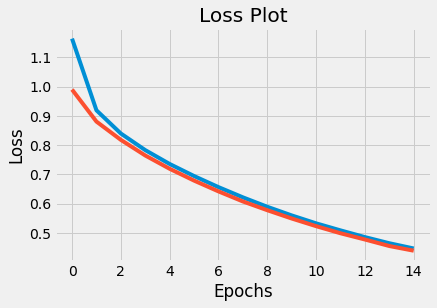

In [43]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [44]:
attention_features_shape = 64
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])#map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [45]:
def beam_evaluate(image, beam_index = 2):
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                   
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=4):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    print(intermediate_caption)
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [46]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [47]:
from nltk.translate.bleu_score import sentence_bleu

In [48]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score: 44.932896411722155
Result: ['a', 'man', 'climbing', 'a', 'rock', '\n', '<end>']
Real Caption: a man wearing a backpack is climbing a rock
Prediction Caption: a man climbing a rock 



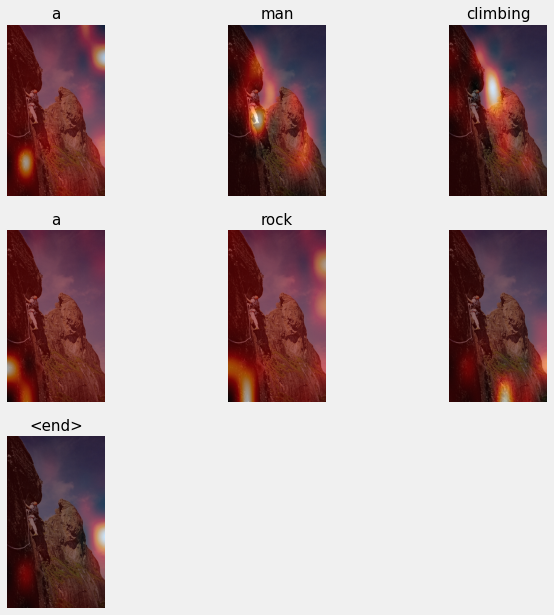

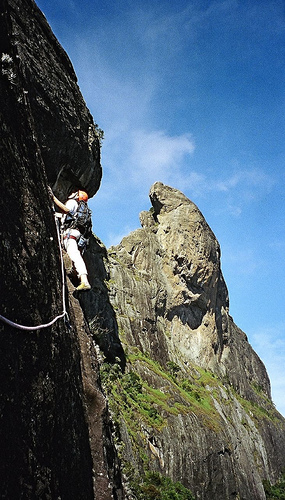

In [49]:
rid = np.random.randint(0, len(path_test))
test_image = path_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))
print(f"BELU score: {score*100}")
print('Result:',result)
print('Real Caption:', real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [50]:
beam_captions=beam_evaluate(test_image)
print(beam_captions)

['<start>', 'a', 'person', 'in', 'a', 'large', 'rock', 'face', 'covered', '<end>']
a person in a large rock face covered


### Text To Speech

In [51]:
!pip install gTTS #Google Translate text-to-speech API

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [52]:
from gtts import gTTS
from IPython import display

In [53]:
text_to_audio = gTTS(pred_caption)
text_to_audio.save('prediction_audio.mp3')

In [54]:
display.display(display.Audio('prediction_audio.mp3'))